In [2]:
import pandas as  pd

dataframe = pd.read_csv("ccgeneral.csv")
dataframe.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [5]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [6]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [8]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [11]:
from sklearn import metrics
## Melhor quanto mais próximo de 1, próximo de 0 indidica sobreposição clusters
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.36459930079687725


In [12]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075602977261863


In [13]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.786045429667


In [18]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [19]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [20]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454479258047573 1.076046490609319 3431.790347716922


In [21]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.30094930969928674 1.1895638980419274 3002.8995405616693


In [22]:
import numpy as np
#A diferença dos resultados do dataset com uma base aleatória deve ser significativo
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.040036110913907685 3.567853164764525 303.7242083083957
0.36454479258047573 1.076046490609319 3431.790347716922


In [24]:
#A diferença dos resultados de samples do dataset deve ser o menor possível
set1, set2, set3 = np.array_split(values, 3)
w1, dbs1, calinski1 = clustering_algorithm(5, set1)
w2, dbs2, calinski2 = clustering_algorithm(5, set2)
w3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3272203126696238 1.058820211490599 1204.064049138465
0.36454479258047573 1.1425530668073534 1194.9476793630297
0.30094930969928674 1.1533931191564895 1159.0005929512176


<function matplotlib.pyplot.show(close=None, block=None)>

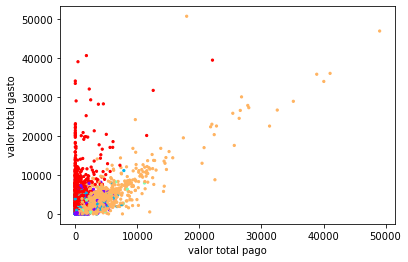

In [26]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

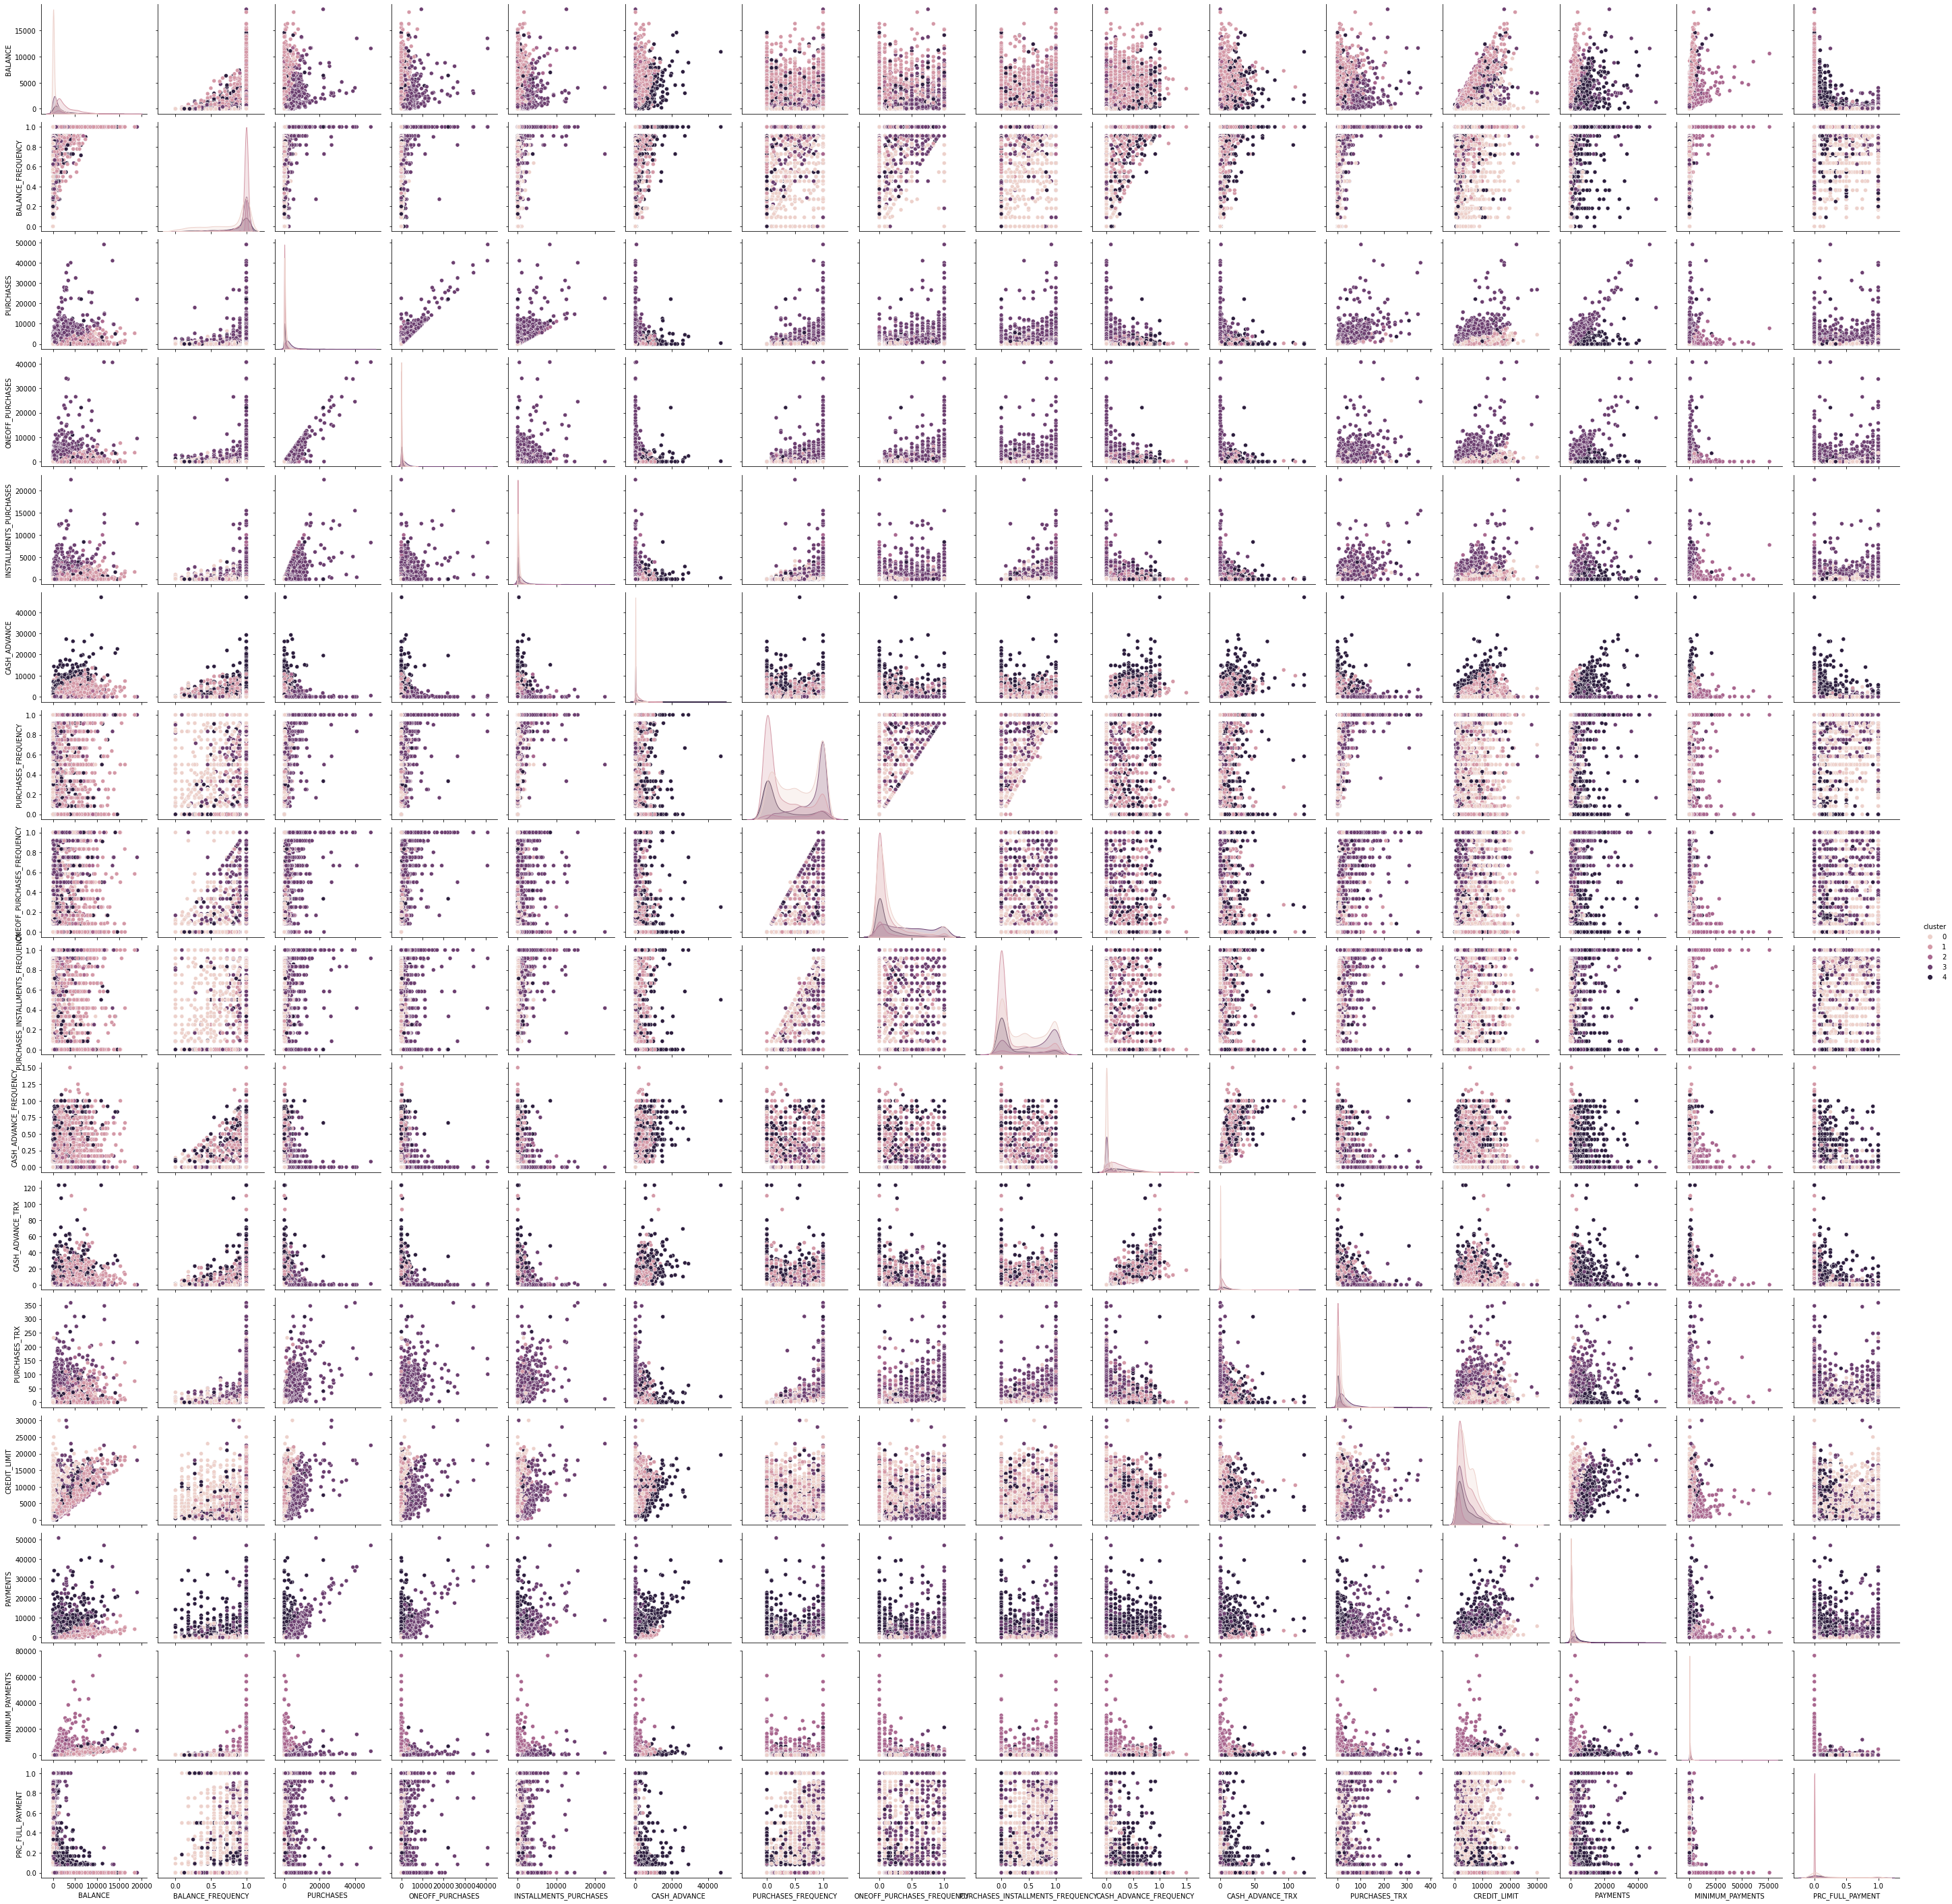

In [27]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [28]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2651.0  3036.934613  2478.185068   6.824905  1257.895616   
2         409.0  1989.027555  1858.869791  70.794108  1016.583226   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4        1074.0  1794.443291  1981.773996   0.000000   507.348768   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.941478   410.126095   9630.367575            3280.0  0.774389   
1        2173.970603  4223.849965  18495.558550            2651.0  0.963768   
2        1330.716005  2149.205166  11670.179850             409.0  0.989435   
3         554.332740  1370.859355  19043.138560            1536.0  0.928220   
4        1087.920500  2312.923253  14581.459140            1074.0  0.862388   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.733727   4483.503862           3280.0  0.246806   
1        ...      1330.489499   8345.641905           2651.0  0.001798   
2        ...      7164.306187  76406.207520            409.0  0.019413   
3        ...       524.184580  18621.013310           1536.0  0.278331   
4        ...       883.991828  21235.065300           1074.0  0.117321   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346748  0.0  0.0  0.000000  0.444444  1.0  
1        0.023251  0.0  0.0  0.000000  0.000000  0.6  
2        0.091113  0.0  0.0  0.000000  0.000000  1.0  
3        0.367137  0.0  0.0  0.083333  0.545455  1.0  
4        0.186720  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [29]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [5.04304115e-01 2.72240037e-04 6.19065286e-02 3.63718661e-02
  2.55563592e-02 2.52712219e-01 6.74445184e-05 2.58563809e-05
  4.50311640e-05 5.73955073e-05 1.15600055e-03 1.33430324e-03
  7.19065068e-01 1.66279141e-01 1.79426352e-01 5.51886878e-07]
 [3.31819573e-01 2.68108548e-04 1.57897411e-01 3.53667582e-02
  1.22917205e-01 5.86410734e-02 1.66414675e-04 2.54680510e-05
  1.47782323e-04 1.94162395e-05 4.30027427e-04 3.85903103e-03
  3.75754913e-01 2.51801450e-01 6.81590209e-01 4.26067138e-06]
 [1.60024706e-01 2.45463238e-04 4.38782328e-01 2.57144577e-01
  1.81809709e-01 2.53743879e-02 2.04517615e-04 8.90287035e-05
  1.50743855e-04 9.35680559e-06 1.69153111e-04 6.17796821e-03
  6.03613847e-01 4.02560302e-01 8.55015664e-02 7.20337923e-05]
 [2.

In [30]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0361
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0546
PRC_FULL_PAYMENT 
0.0000


BALANCE 0.0224 #limite disponível do cliente
PURCHASES 0.0196 #valor total de compras
CASH_ADVANCE 0.0226 #valor total de saques
CREDIT_LIMIT 0.0360 #imite total de crédito
PAYMENTS 0.0280 #valor total pago
MINIMUM_PAYMENTS 0.0542 #o mínimo pago

In [32]:
dataframe.groupby("cluster")["BALANCE"].describe()

count         mean          std        min          25%  \
cluster                                                             
0        3280.0   443.746756   846.398201   0.000000    23.365333   
1        2651.0  3036.934613  2478.185068   6.824905  1257.895616   
2         409.0  1989.027555  1858.869791  70.794108  1016.583226   
3        1536.0  1142.514535  1664.888183   0.000000   212.178230   
4        1074.0  1794.443291  1981.773996   0.000000   507.348768   

                 50%          75%           max  
cluster                                          
0          82.941478   410.126095   9630.367575  
1        2173.970603  4223.849965  18495.558550  
2        1330.716005  2149.205166  11670.179850  
3         554.332740  1370.859355  19043.138560  
4        1087.920500  2312.923253  14581.459140

In [34]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0         443.746756   629.249107    141.482978   5130.547795   814.294226
1        3036.934613   385.478510   1635.682267   4493.681630   968.765803
2        1989.027555   855.672225    423.188665   2230.195599  1338.842680
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179
4        1794.443291   478.411620   3266.686592   3983.399639  4712.044614


<ipython-input-34-92754d34d3f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [35]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.746756   629.249107    141.482978   5130.547795   814.294226   
1        3036.934613   385.478510   1635.682267   4493.681630   968.765803   
2        1989.027555   855.672225    423.188665   2230.195599  1338.842680   
3        1142.514535  3274.126719    181.727235   4096.718849  3036.609179   
4        1794.443291   478.411620   3266.686592   3983.399639  4712.044614   

         n_clients  
cluster             
0             3280  
1             2651  
2              409  
3             1536  
4             1074  


<ipython-input-35-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque. Piores pagadores. Boa quantidade de clientes.
CLUSTER 2: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.
CLUSTER 3: Clientes que gastam muito com compras. Melhores pagadores.
CLUSTER 4: Clientes que gastam muito com saques. Pagam as vezes.